In [3]:
!pip install opencv-python opencv-python-headless


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   - -------------------------------------- 1.6/39.4 MB 8.4 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/39.4 MB 7.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/39.4 MB 7.3 MB/s eta 0:00:05
   ------ --------------------------------- 6.0/39.4 MB 7.5 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/39.4 MB 8.1 MB/s eta 0:00:04
   --------- ------------------------------ 9.7/39.4 MB 8.0 MB/s eta 0:00:04
   ----------- ---------------------------- 11.5/39.4 MB 8.2 MB/s eta 0:00:04
   ------------- -------------------------- 13.6/39.4 MB 8.2 MB/s eta 0:00:04
   --------------- ------------------------ 15.2/39.4 MB 8.1 MB/s eta 0:00:03
   ----------------- ---------------------- 17.6/39.4 MB 8.4 MB/s eta 0:00:03
   --

Model Accuracy: 66.67%


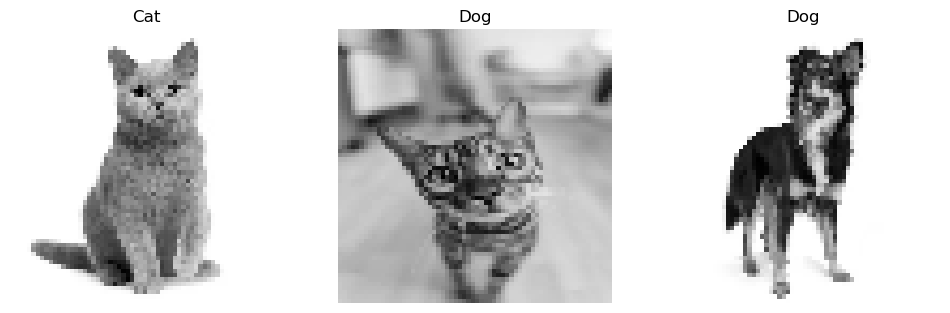

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Set dataset path
dataset_path = r"C:\Users\ASUS\Downloads\pets"  # Make sure this path contains 'dog/' and 'cat/' folders
img_size = 64  # Resize images to 64x64

# Load dataset
data = []
labels = []

for category in ["dog", "cat"]:
    path = os.path.join(dataset_path, category)
    class_label = 1 if category == "dog" else 0  # 1 for dogs, 0 for cats

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  # Resize to 64x64
            data.append(img.flatten())  # Flatten into 1D array
            labels.append(class_label)

# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualizing test results
num_images = min(len(X_test), 5)  # Ensure we don't exceed available images
fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

for i, ax in enumerate(axes):
    img = X_test[i].reshape(img_size, img_size)  # Reshape for visualization
    label = "Dog" if y_pred[i] == 1 else "Cat"
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis("off")

plt.show()
